Diberikan dataset sebagai berikut:
https://drive.google.com/file/d/1W_-TeeNbSMCHxGhz6TJfEHFHgnyMiBQk/view?usp=share_link




*   Nama : Dhea Marenty Suwarno
*   NIM : 20.11.3725
*   Kelas : Big Data dan Data Mining 4







1. Lakukan klasifikasi dengan ketentuan sebagai berikut:


*   a. gunakan algoritma naive bayes
*   b. gunakan algoritma random forest

2. Lakukan analisa performa naive bayes dan random forest tersebut

3. Gunakan K-FOLD VALIDATION DENGAN nilai K=10, untuk mengukur performa 2 algoritma tersebut

4. Lakukan analisa, algoritma mana yang paling baik performanya menurut anda, berikan penjelasannya

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load Dataset

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Mining Sem 5/Dataset/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


ENCODING

In [ ]:
le = LabelEncoder()

cols =['species']

for col in cols:
    df[col]=le.fit_transform(df[col])

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


KORELASI

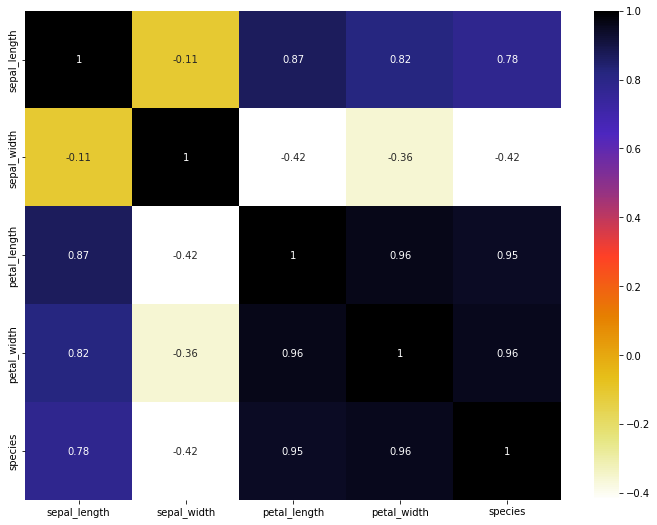

In [ ]:
cor = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor['species'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.6]
relevant_features

sepal_length    0.782561
petal_length    0.949043
petal_width     0.956464
species         1.000000
Name: species, dtype: float64

In [ ]:
#Menghapus Kolom yangn memiliki korelasi < 0.6
df.drop('sepal_width', inplace=True, axis=1)

df

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0
...,...,...,...,...
145,6.7,5.2,2.3,2
146,6.3,5.0,1.9,2
147,6.5,5.2,2.0,2
148,6.2,5.4,2.3,2


# **NAIVE BAYES**

Data Split

In [ ]:
#X adalah variabel independen - berisi Age dan Estimated Salary
X = df.iloc[:, 0:3].values

#y adalah variabel dependen - berisi fitur purchased
y = df.iloc[:, -1].values

In [ ]:
print("X : \n", X[0:5])
print("\ny : \n", y[0:5])

X : 
 [[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]]

y : 
 [0 0 0 0 0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    random_state = 0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 3)
(120,)
(30, 3)
(30,)


Create Classifier Model

In [ ]:
classifier_model_binary = GaussianNB()
classifier_model_binary.fit(X_train, y_train)

GaussianNB()

In [ ]:
NB_ypred = classifier_model_binary.predict(X_test)

In [ ]:
NB_ypred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
classifier_model_binary.predict_proba(X_test)

array([[1.40334189e-228, 1.83498798e-006, 9.99998165e-001],
       [1.76850650e-080, 9.99993241e-001, 6.75896642e-006],
       [1.00000000e+000, 1.35372006e-015, 3.07844032e-026],
       [2.25051376e-303, 1.08566074e-006, 9.99998914e-001],
       [1.00000000e+000, 5.24875496e-016, 8.13709845e-027],
       [2.56266564e-317, 3.93887193e-010, 1.00000000e+000],
       [1.00000000e+000, 1.28103372e-015, 1.54527271e-026],
       [1.59114169e-145, 8.46121547e-001, 1.53878453e-001],
       [1.81816012e-148, 8.91673500e-001, 1.08326500e-001],
       [1.35283863e-091, 9.99859382e-001, 1.40618059e-004],
       [1.43159306e-208, 3.83779697e-001, 6.16220303e-001],
       [5.60224594e-131, 9.71162578e-001, 2.88374215e-002],
       [8.93629150e-131, 9.98645700e-001, 1.35430019e-003],
       [6.42581242e-138, 9.40740342e-001, 5.92596576e-002],
       [8.80295654e-139, 9.88470267e-001, 1.15297333e-002],
       [1.00000000e+000, 4.67327458e-017, 6.43817969e-028],
       [1.36139346e-129, 9.88374868e-001

In [ ]:
print(classification_report(y_test, NB_ypred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **RANDOM FOREST**

In [ ]:
classifier_model_RFC = RandomForestClassifier()
classifier_model_RFC.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
RFC_pred = classifier_model_RFC.predict(X_test)

In [ ]:
classifier_model_RFC.predict_proba(X_test)

array([[0.  , 0.02, 0.98],
       [0.  , 0.94, 0.06],
       [0.95, 0.05, 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.01, 0.99],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.89, 0.11],
       [0.  , 0.96, 0.04],
       [0.  , 0.43, 0.57],
       [0.  , 0.97, 0.03],
       [0.  , 0.94, 0.06],
       [0.  , 0.96, 0.04],
       [0.  , 0.94, 0.06],
       [1.  , 0.  , 0.  ],
       [0.  , 0.9 , 0.1 ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.37, 0.63],
       [0.  , 0.98, 0.02],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.23, 0.77],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.02, 0.96, 0.02],
       [1.  , 0.  , 0.  ]])

In [ ]:
print(classification_report(y_test, RFC_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **K-FOLD VALIDATION**

In [ ]:
scoreNB = cross_validate(classifier_model_binary, X_test, y_test, cv=10)

df_scoreNB = pd.DataFrame(scoreNB)
print(df_scoreNB)
print(f'\nAverage :\n{df_scoreNB.mean()}')

   fit_time  score_time  test_score
0  0.001496    0.000676    1.000000
1  0.001072    0.000520    1.000000
2  0.000961    0.001125    1.000000
3  0.000988    0.000539    0.666667
4  0.001043    0.000561    1.000000
5  0.001059    0.000558    1.000000
6  0.021717    0.000820    1.000000
7  0.006256    0.000722    1.000000
8  0.018470    0.000694    1.000000
9  0.001133    0.000634    0.666667

Average :
fit_time      0.005419
score_time    0.000685
test_score    0.933333
dtype: float64


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
#K-Fold Cross Validation untuk Random Forest Classification
scoreRFC = cross_validate(classifier_model_RFC, X_test, y_test, cv=10)

df_scoreRFC = pd.DataFrame(scoreRFC)
print(df_scoreRFC)
print(f'\nAverage :\n{df_scoreRFC.mean()}')

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


   fit_time  score_time  test_score
0  0.388009    0.015932    1.000000
1  0.257394    0.015711    1.000000
2  0.343658    0.031762    1.000000
3  0.324925    0.018456    0.666667
4  0.121109    0.008664    1.000000
5  0.112412    0.009429    0.666667
6  0.126866    0.008651    1.000000
7  0.116341    0.008660    1.000000
8  0.113604    0.008450    1.000000
9  0.113693    0.009281    1.000000

Average :
fit_time      0.201801
score_time    0.013500
test_score    0.933333
dtype: float64


KESIMPULAN

Berdasarkan percobaan yang berada di atas dapat di simpulkan sebagai berikut:
1. Fit time dari Naive Bayes jauh lebih kecil (lebih cepat) dari Random Forest
2. Score time dari Naive Bayes jauh lebih kecil (lebih cepat) dari Random Forest
3. Test score hampir sama (sama-sama akurat) antara Naive Bayes terhadap Random Forest

Jadi, algoritma yang lebih baik adalah Naive Bayes Algorithm